In [15]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-04-07 16:50:49,724: Credentials are already in use. The existing account in the session will be replaced.


In [16]:
# creating the circuit
qr = QuantumRegister(4)
cr = ClassicalRegister(2);
circuit = QuantumCircuit(qr,cr)

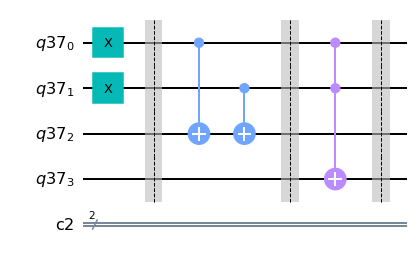

In [17]:
# designing half adder
# Encode input
circuit.x(0)
circuit.x(1)
circuit.barrier()
# Do XOR operation with control not gate 
circuit.cx(0,2)
circuit.cx(1,2)
circuit.barrier()
# do And operation with CCNOT gate for carray
circuit.ccx(0,1,3)
circuit.barrier()
# draw circuit
circuit.draw(output='mpl')

The state-vector representation : 
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

The bloch sphere representation : 


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


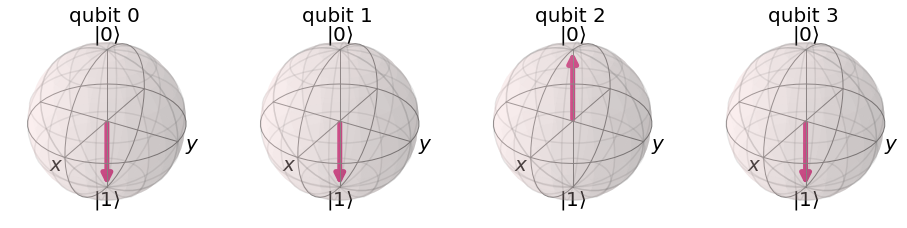

In [18]:
# for state vector visualization & bloch sphere visualization
statevector_simulator= Aer.get_backend('statevector_simulator')
jobs= execute(circuit,backend=statevector_simulator)
state_vector= jobs.result().get_statevector()
print('The state-vector representation : ')
print(state_vector)
print()
print('The bloch sphere representation : ')
plot_bloch_multivector(state_vector)


The Q sphere representation : 


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


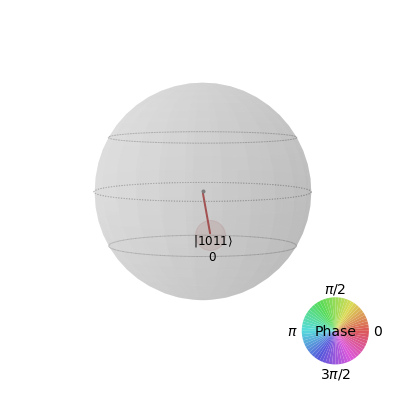

In [19]:
#  plotting in q_sphere 
print('The Q sphere representation : ')
plot_state_qsphere(state_vector,show_state_phases = True)

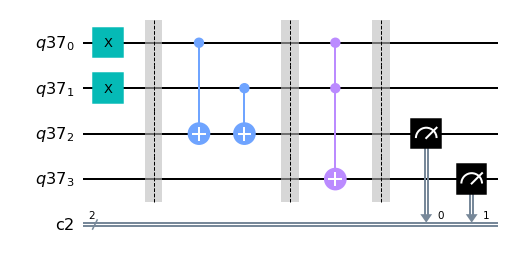

In [20]:
#  measure the qubit 2 & 3
circuit.measure(2,0)
circuit.measure(3,1)
circuit.draw()

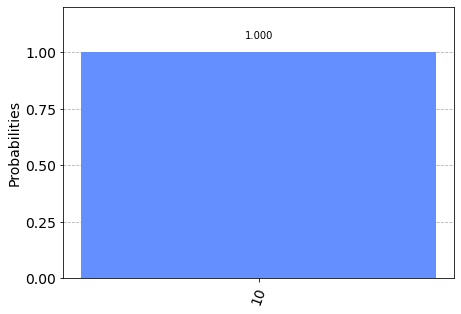

In [21]:
# show the result of qasm_simulator result
backend= Aer.get_backend('qasm_simulator')
result= execute(circuit,backend=backend,shots=1024).result()
count= result.get_counts()
plot_histogram(count)

In [22]:
provider = IBMQ.get_provider('ibm-q') 
qcomp= provider.get_backend('ibmq_belem')
job = execute(circuit,backend=qcomp)

In [23]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


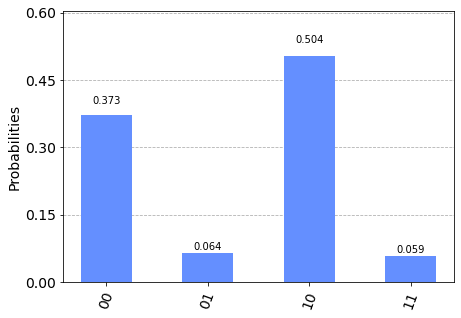

In [25]:
result= job.result()
plot_histogram(result.get_counts(circuit))
